<h1> Analítica de Datos | PAR </h1>
<h2> <strong>Actividad 10:</strong> Replicación y análisis del caso <i>"Cannabis Species EDA and Models Pipeline"</i> </h2>

<p>
    <strong>Nombre del alumno:</strong> Pedro Aguilar Rodriguez
    <br>
    <strong>Código del alumno:</strong> 218713675
    <br>
    <strong>Repositorio GitHub: </strong><a href='https://github.com/pedro1001031001/AD-2025-B/tree/master'>https://github.com/pedro1001031001/AD-2025-B/tree/master</a>.
    <br>
    <strong>Fecha:</strong> 14 de septiembre de 2025
    <br>
    <strong>Objetivo(s):</strong>
    <br>
    <ol>
        <li> Replicar y ejecutar cada parte del código.</li>
        <li> Validar las salidas y resultados/gráficos.</li>
        <li> Analizar puntualmente cada caso.</li>
        <li> Generar una conclusión.</li>
    </ol>
</p>

<p>
    La primera parte establece las librerias a contemplar para desarrollar el análisis considerado sobre los datos.
</p>

In [209]:
pip install tpot

  DEPRECATION: Building 'func-timeout' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'func-timeout'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'stopit' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'stopit'. Discussion can be found at https://github.com/pypa/pip/issues/6334



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 3.9 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00
  Created wheel for configspace: filename=configspace-1.2.1-py3-none-any.whl size=116016 sha256=17ffdac20afb13d4b62fe0f091513d1e6f44420debd464c5c5a887a7ad291da6
  Store

In [139]:
pip install wordcloud matplotlib 

In [158]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 8.3 MB/s eta 0:00:07
   - -------------------------------------- 1.6/56.8 MB 4.1 MB/s eta 0:00:14
   -- ------------------------------------- 2.9/56.8 MB 4.9 MB/s eta 0:00:12
   --- ------------------------------------ 4.7/56.8 MB 6.0 MB/s eta 0:00:09
   ---- ----------------------------------- 6.0/56.8 MB 5.9 MB/s eta 0:00:09
   ----- ---------------------------------- 7.3/56.8 MB 6.3 MB/s eta 0:00:08
   ------ --------------------------------- 8.9/56.8 MB 6.3 MB/s eta 0:00:08
   ------- -------------------------------- 10.5/56.8 MB 6.4 MB/s eta 0:00:08
   -------- ------------------------------- 11.8/56.8 MB 6.3 MB/s eta 0:00:08
   -------- ------------------------------- 12.3/56.8 MB 6.1 MB/s eta 0:00:08
   -------- ------------------------------- 12.6/56.8 MB 5.8 MB/s eta 0:00:08
   --------- ------------------------------ 12.8/56.8 MB 5.4 MB/s eta 0:00:09
 

In [197]:
# Librerias
import pandas as pd # Para generar dataframes
import matplotlib.pyplot as plt # Para generar gráficas
import seaborn as sns 
import numpy as np # Para operaciones

plt.style.use('ggplot') # Establece el estilo de las gráficas

from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
#from sklearn.feature_extraction import stop_words

<p>
    Seguido, se carga los datos contenidos en el archivo con extensión ".csv"
</p>

In [198]:
strains = pd.read_csv("./cannabis.csv")

<p>
    Como segunda parte se hace un reconocimiento de las variables en las cuales se distribuye los datos, así como el tipo de datos que se contiene en el archivo.
</p>

In [199]:
print("Número de observaciones y de variables:", strains.shape,"\n") # Se imprime la cantidad máxima de datos con respecto a una columna, así como el número de columnas

print("Variables:")
print(strains.isnull().sum(),"\n")# Se imprime los encabezdos en las columnas.

print("Tipos de datos de las variables:")
print(strains.info(),"\n") # Se imprime la información básica sobre las columnas.

print("Primeras 6 instancias de la tabla:")
strains.head(n=6) # Contiene las primeras 6 intancias de la tabla.

Número de observaciones y de variables: (2351, 6) 

Variables:
Strain           0
Type             0
Rating           0
Effects         87
Flavor         156
Description     37
dtype: int64 

Tipos de datos de las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2264 non-null   object 
 4   Flavor       2195 non-null   object 
 5   Description  2314 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB
None 

Primeras 6 instancias de la tabla:


Strain    Type  Rating                                     Effects  \
0          100-Og  hybrid     4.0  Creative,Energetic,Tingly,Euphoric,Relaxed   
1  98-White-Widow  hybrid     4.7    Relaxed,Aroused,Creative,Happy,Energetic   
2            1024  sativa     4.4   Uplifted,Happy,Relaxed,Energetic,Creative   
3        13-Dawgs  hybrid     4.2     Tingly,Creative,Hungry,Relaxed,Uplifted   
4        24K-Gold  hybrid     4.6   Happy,Relaxed,Euphoric,Uplifted,Talkative   
5      3-Bears-Og  indica     0.0                                         NaN   

                      Flavor  \
0        Earthy,Sweet,Citrus   
1      Flowery,Violet,Diesel   
2    Spicy/Herbal,Sage,Woody   
3  Apricot,Citrus,Grapefruit   
4       Citrus,Earthy,Orange   
5                        NaN   

                                         Description  
0  $100 OG is a 50/50 hybrid strain that packs a ...  
1  The ‘98 Aloha White Widow is an especially pot...  
2  1024 is a sativa-dominant hybrid bred in Spain...  
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...  
4  Also known as Kosher Tangie, 24k Gold is a 60%...  
5  3 Bears OG by Mephisto Genetics is an autoflow...

<p>
    Una vez reconocido los detalles de los datos, se realiza una conversión de los datos.
</p>

In [103]:
strains['Type'] = strains.Type.astype(str)
print(strains.nunique())

Strain         2350
Type              3
Rating           26
Effects        1654
Flavor         1292
Description    2311
dtype: int64


<p>
    Como tercera parte, se contea y se obtiene las proporciones de los tipos de cánnabis, y se ilustra estas unidades.
</p>

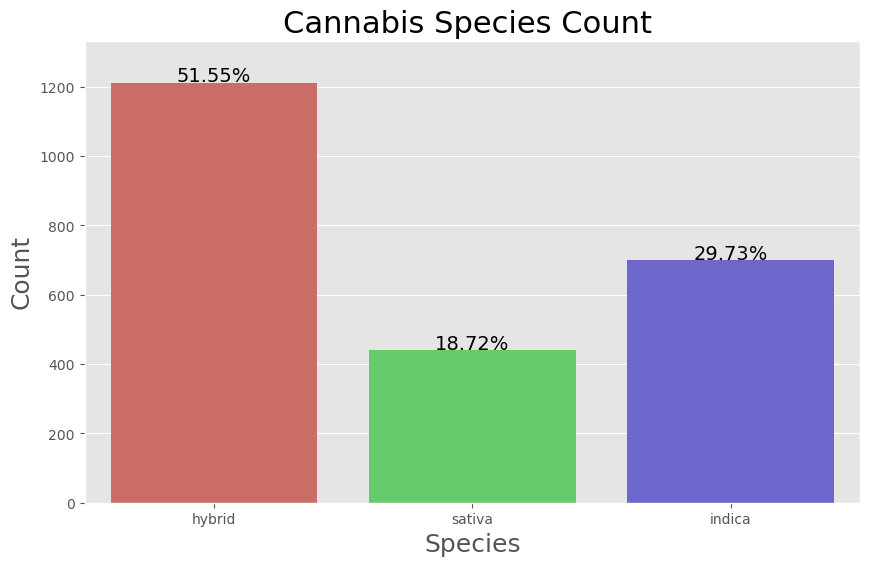

In [104]:
total = len(strains) # Número de elementos en Strains.
plt.figure(figsize=(10,6)) # Determinación del tamaño del gráfico a formarse.

g = sns.countplot(x="Type", data=strains, hue="Type",
                  palette='hls', color='blue')
g.set_title("Cannabis Species Count ", fontsize=22) # Establece un título sobre el gráfico y determina el tamaño de las letras
g.set_xlabel('Species', fontsize=18) # Establece el tamaño y título para el eje x
g.set_ylabel('Count', fontsize=18) # Establece el tamaño y título para el eje y
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14)
    
g.set_ylim(0, max(sizes) * 1.10) # Establece el tamaño máximo a mostras del eje y.

plt.show() # Mostrar el gráfico determinado.

<p>
    Seguido, se obtiene la distribucion de los datos.
</p>

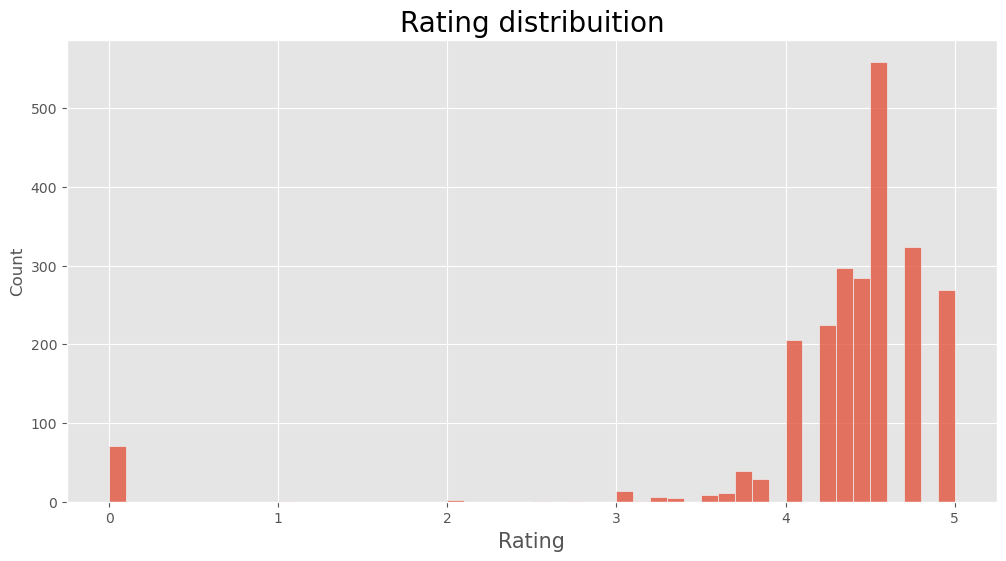

In [105]:
plt.figure(figsize=(12,6))

#Total rating distribuition
g = sns.histplot(strains["Rating"],
                 bins=50)
g.set_title("Rating distribuition", 
            size = 20)
g.set_xlabel('Rating',
             fontsize=15)

plt.show()

<p>
    Además, hacemos estadística descriptiva de los datos, distribuyendo los ratings.
</p>

In [106]:
print("Rating Distribuition by Species Type")
pd.crosstab(strains[strains.Rating > 3.0]['Rating'], strains.Type).T

Rating Distribuition by Species Type


Rating  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.0  4.1  4.2  4.3  4.4  \
Type                                                                           
hybrid    1    1    2    2    5    6    7    9    9   62   56  113  150  144   
indica    0    2    0    1    2    4    5   10   12   24   33   64   89   83   
sativa    0    0    1    2    2    1    4    4    8   18   12   48   58   57   

Rating  4.5  4.6  4.7  4.8  4.9  5.0  
Type                                  
hybrid  164  114   95   88   31  102  
indica   94   78   47   41   19   70  
sativa   59   50   22   30    9   38

<p>
    Por último, en esta parte, se realiza la representaicón de los datos en histogramas y diagramas de cajas y bigotes.
</p>

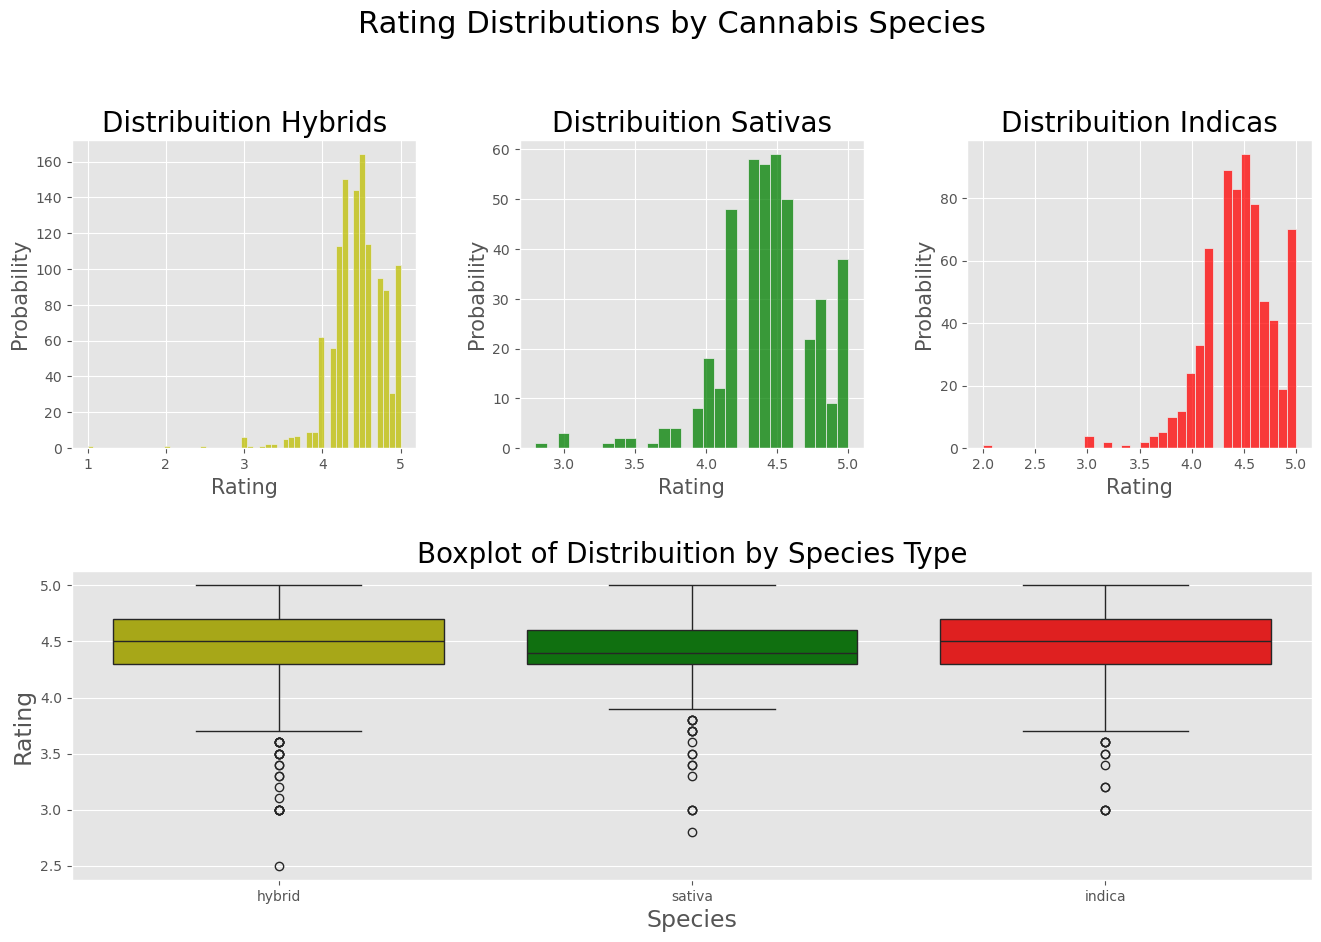

In [107]:
plt.figure(figsize=(16,10))

plt.suptitle('Rating Distributions by Cannabis Species', fontsize=22)

#Let's look the Rating distribuition by Type.
g = plt.subplot(231)
g = sns.histplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"],
                 color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Probability", fontsize=15)
g.set_title("Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(232)
g1 = sns.histplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"],
                  color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Probability", fontsize=15)
g1.set_title("Distribuition Sativas",
             fontsize=20)

g2 = plt.subplot(233)
g2 = sns.histplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Probability", fontsize=15)
g2.set_title("Distribuition Indicas", 
             fontsize=20)

g3 = plt.subplot(212)

my_pal = {"hybrid": "y", "sativa": "g", "indica":"r"}

#I will now explore the Rating distribuition by Type
g3 = sns.boxplot(x="Type",y="Rating", hue= "Type", palette=my_pal,
                data=strains[strains["Rating"] > 2])
g3.set_title("Boxplot of Distribuition by Species Type", 
            fontsize=20)
g3.set_xlabel("Species", fontsize=17)
g3.set_ylabel("Rating", fontsize=17)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.85)

plt.show()

<p>
    Como cuarta parte, se extrae los datos relacionados a los efectos y sabores del cánnabis, clasificandolos a su vez.
</p>

In [108]:
df_effect = pd.DataFrame(strains.Effects.str.split(",", n = 4, expand=True))
df_effect.columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5']

df_flavors = pd.DataFrame(strains.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])

In [109]:
#Concatenating the new variables with strains
strains = pd.concat([strains, df_effect], axis=1)
strains = pd.concat([strains, df_flavors], axis=1)

#Looking the result
strains.head()

strains.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Effect_1', 'Effect_2', 'Effect_3', 'Effect_4', 'Effect_5', 'Flavor_1',
       'Flavor_2', 'Flavor_3'],
      dtype='object')

<p>
    Seguido a lo anterior, una vez clasificados los tipos de cánnabis, se ilustran los efectos y los ratings.
</P>

The top 5 First Effects related
Effect_1
Relaxed     825
Happy       476
Euphoric    249
Uplifted    244
Sleepy       89
Name: count, dtype: int64


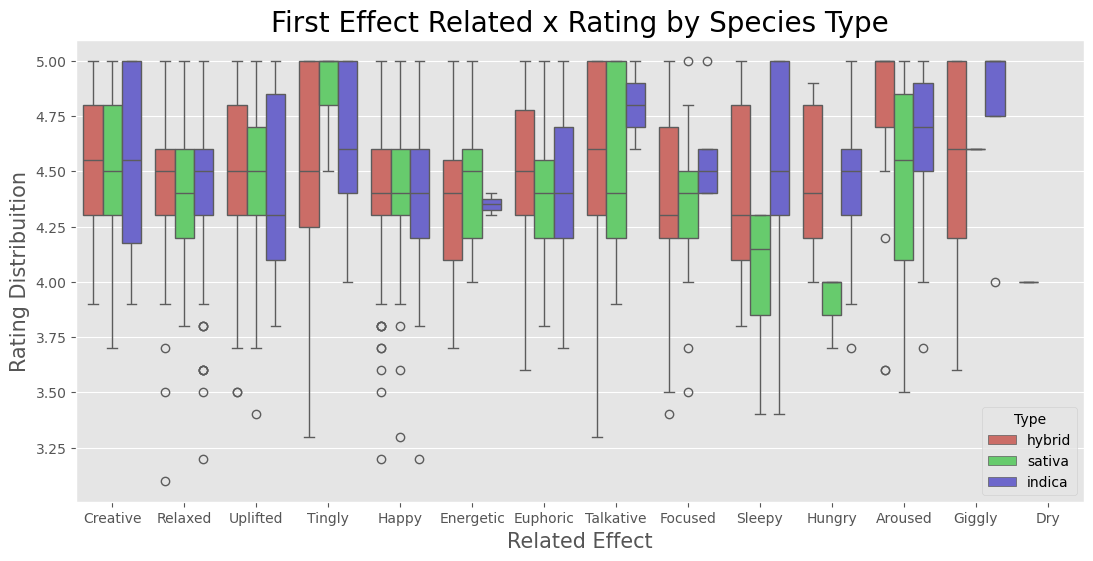

In [110]:
print("The top 5 First Effects related")
print(strains['Effect_1'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_1', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("First Effect Related x Rating by Species Type",
            fontsize=20)
plt.show()

The top 5 Second related Effects
Effect_2
Happy       571
Relaxed     351
Euphoric    342
Uplifted    321
Sleepy      197
Name: count, dtype: int64


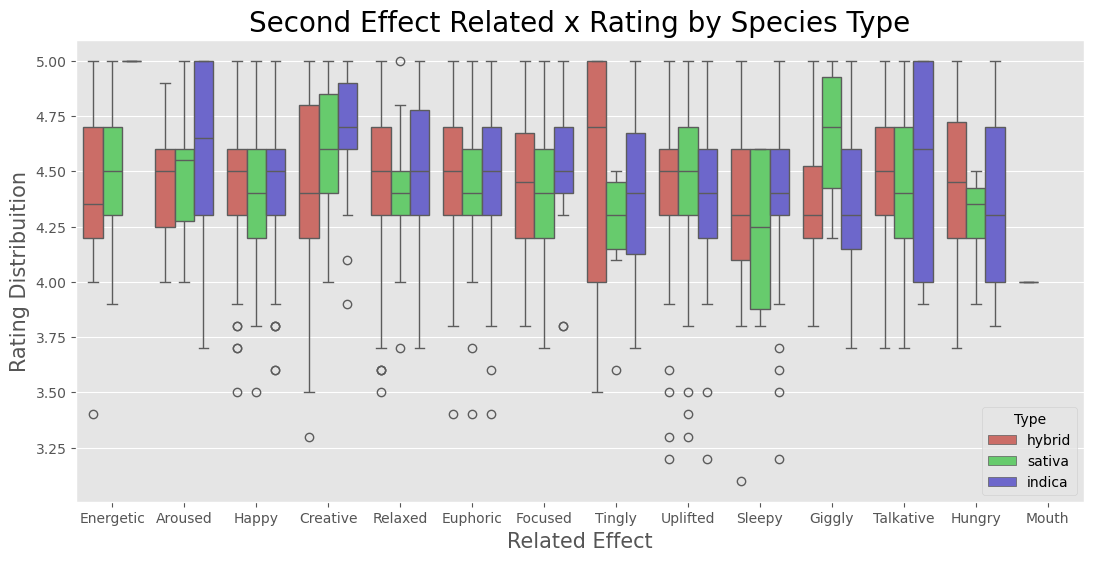

In [111]:
print("The top 5 Second related Effects")
print(strains['Effect_2'].value_counts()[:5])

plt.figure(figsize=(13,6))

g = sns.boxplot(x = 'Effect_2', y="Rating",
                hue="Type",
                data=strains[strains["Rating"] > 3],
                palette="hls")
g.set_xlabel("Related Effect", fontsize=15)
g.set_ylabel("Rating Distribuition", fontsize=15)
g.set_title("Second Effect Related x Rating by Species Type",
            fontsize=20)

plt.show()

<p>
    Después, se ilustan la frecuencia de los sabores.
</p>

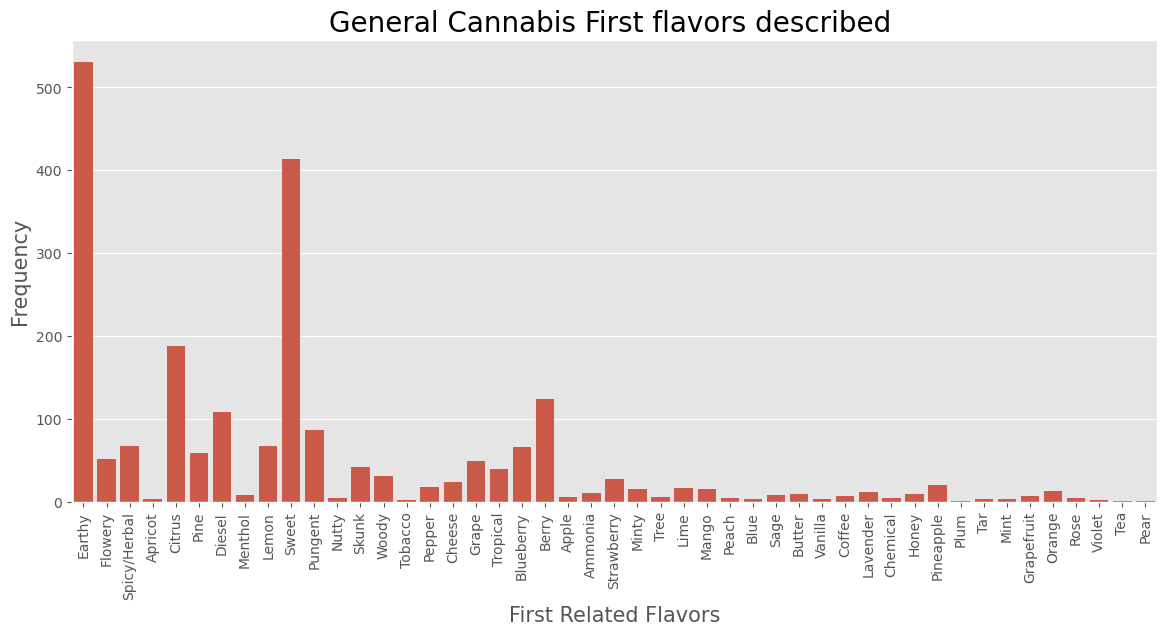

In [112]:
plt.figure(figsize=(14,6))
sns.countplot( x = 'Flavor_1', data=strains)
plt.xticks(rotation=90)
plt.xlabel('First Related Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("General Cannabis First flavors described ",
          fontsize=20)
plt.show()

<p>
    Además, se genera la gráfica de de la distribución de los ratings.
</p>

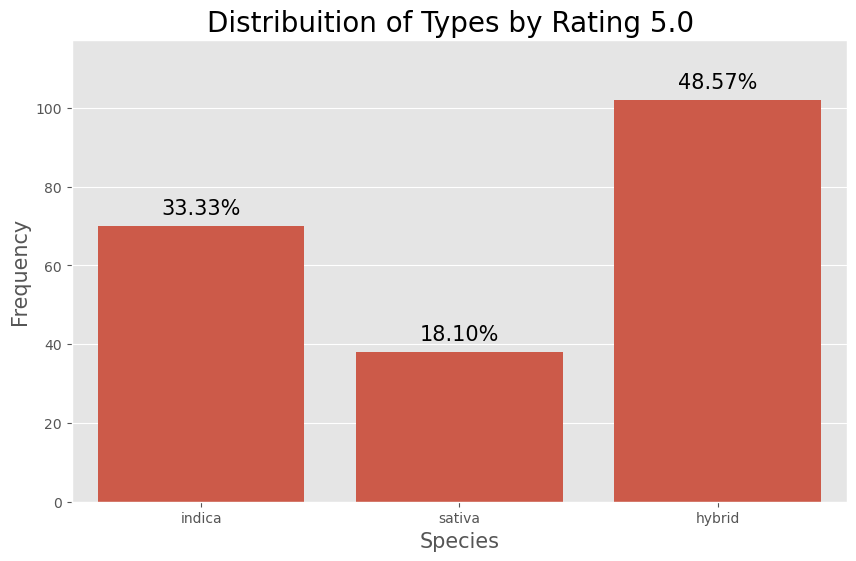

In [113]:
#Whats the type with most strains with rating 5?
total_rat5 = len(strains[strains["Rating"] == 5])

plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=strains[strains["Rating"] == 5])
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Distribuition of Types by Rating 5.0  ", 
            fontsize=20)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_rat5 * 100),
            ha="center", fontsize=15) 
g.set_ylim(0,max(sizes)*1.15)

plt.show()

<p>
    Se explorá los efectos pincipales y los sabores.
</p>

C:\Users\qwerty\AppData\Local\Temp\ipykernel_29164\2811480767.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g1.set_xticklabels(g1.get_xticklabels(),rotation=45, ha='right')


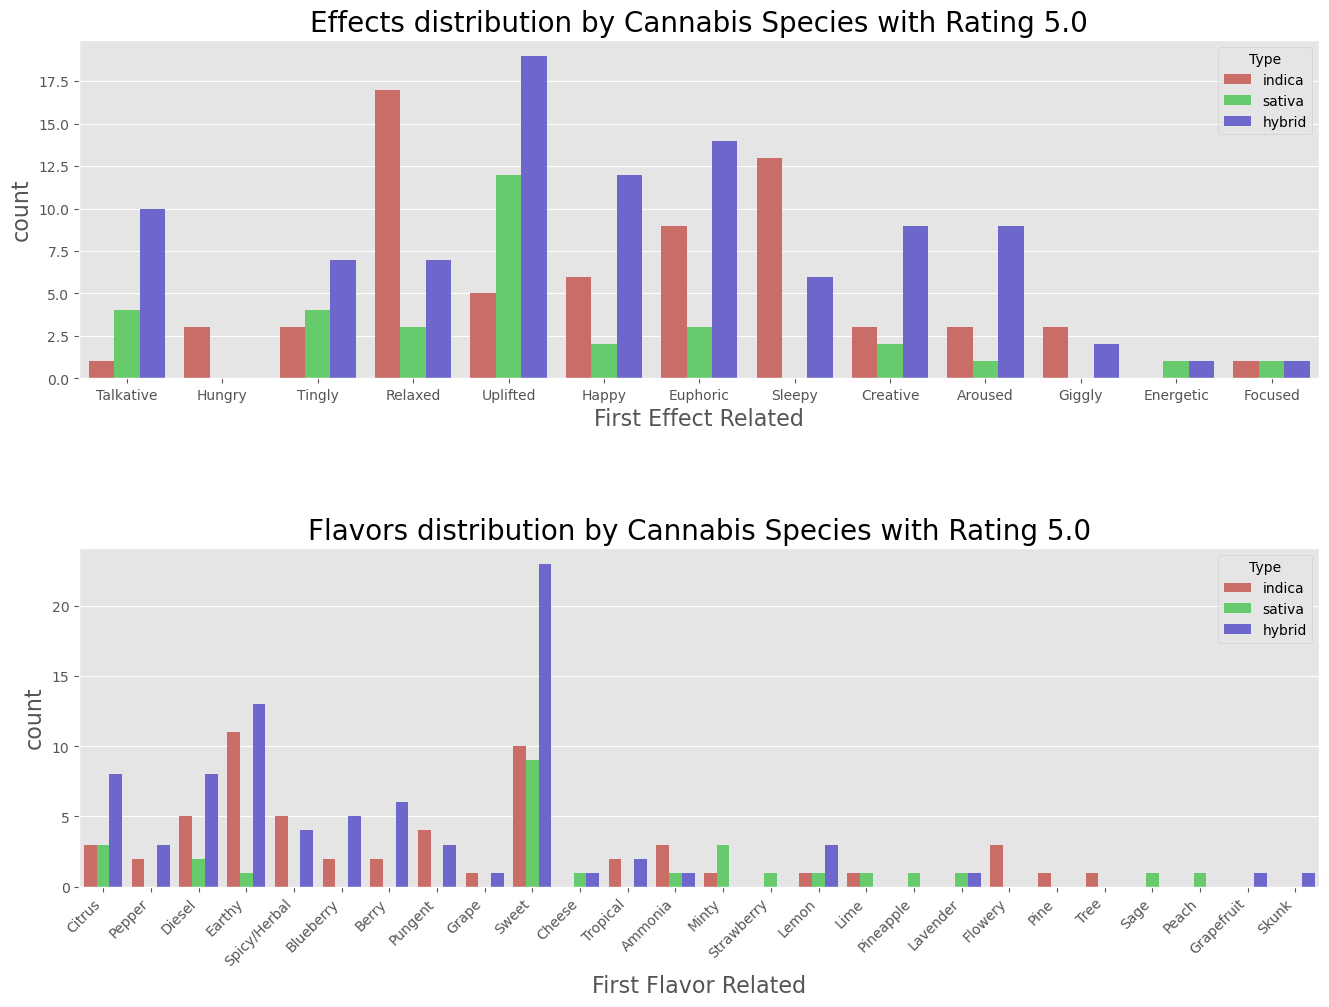

In [114]:
strains_top = strains[strains["Rating"] == 5]

plt.figure(figsize=(16,11))

plt.subplot(211)
g = sns.countplot(x ='Effect_1',data = strains_top,hue="Type", palette='hls')
g.set_title("Effects distribution by Cannabis Species with Rating 5.0", fontsize=20)
g.set_xlabel('First Effect Related', fontsize=16)
g.set_ylabel('count', fontsize=16)

plt.subplot(212)
g1 = sns.countplot(x ='Flavor_1',data = strains_top,hue="Type", palette='hls')
g1.set_title("Flavors distribution by Cannabis Species with Rating 5.0", fontsize=20)
g1.set_xlabel('First Flavor Related', fontsize=16)
g1.set_ylabel('count', fontsize=16)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45, ha='right')

plt.subplots_adjust(hspace = 0.5)

plt.show()

<p>
    Seguido se explorará los efectos totales. Además, se elimina columnos ya no indispensables. Y se crea un separador.
</p>

In [115]:
hibridas = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == 'indica']
sativas = strains[strains.Type == 'sativa']

In [ ]:
del strains["Effects"]
del strains["Flavor"]

In [121]:
def get_effects(df):
    effects_dict = {}
    for effect in df['Effects']:
        if isinstance(effect, str):  # solo si es string
            for e in effect.split(','):
                e = e.strip().lower()
                effects_dict[e] = effects_dict.get(e, 0) + 1
    return effects_dict

In [122]:
#Runing flavors counts to sativas
sativa_effects = get_effects(sativas)
sativa_effects = pd.DataFrame.from_dict(sativa_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_effects = get_effects(indicas)
indica_effects = pd.DataFrame.from_dict(indica_effects,
                                        orient='index').reset_index().rename(columns={'index': 'effects', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_effects = get_effects(hibridas)
hibridas_effects = pd.DataFrame.from_dict(hibridas_effects,
                                          orient='index').reset_index().rename(columns={'index': 'effects',
                                                                                        0:'count'})

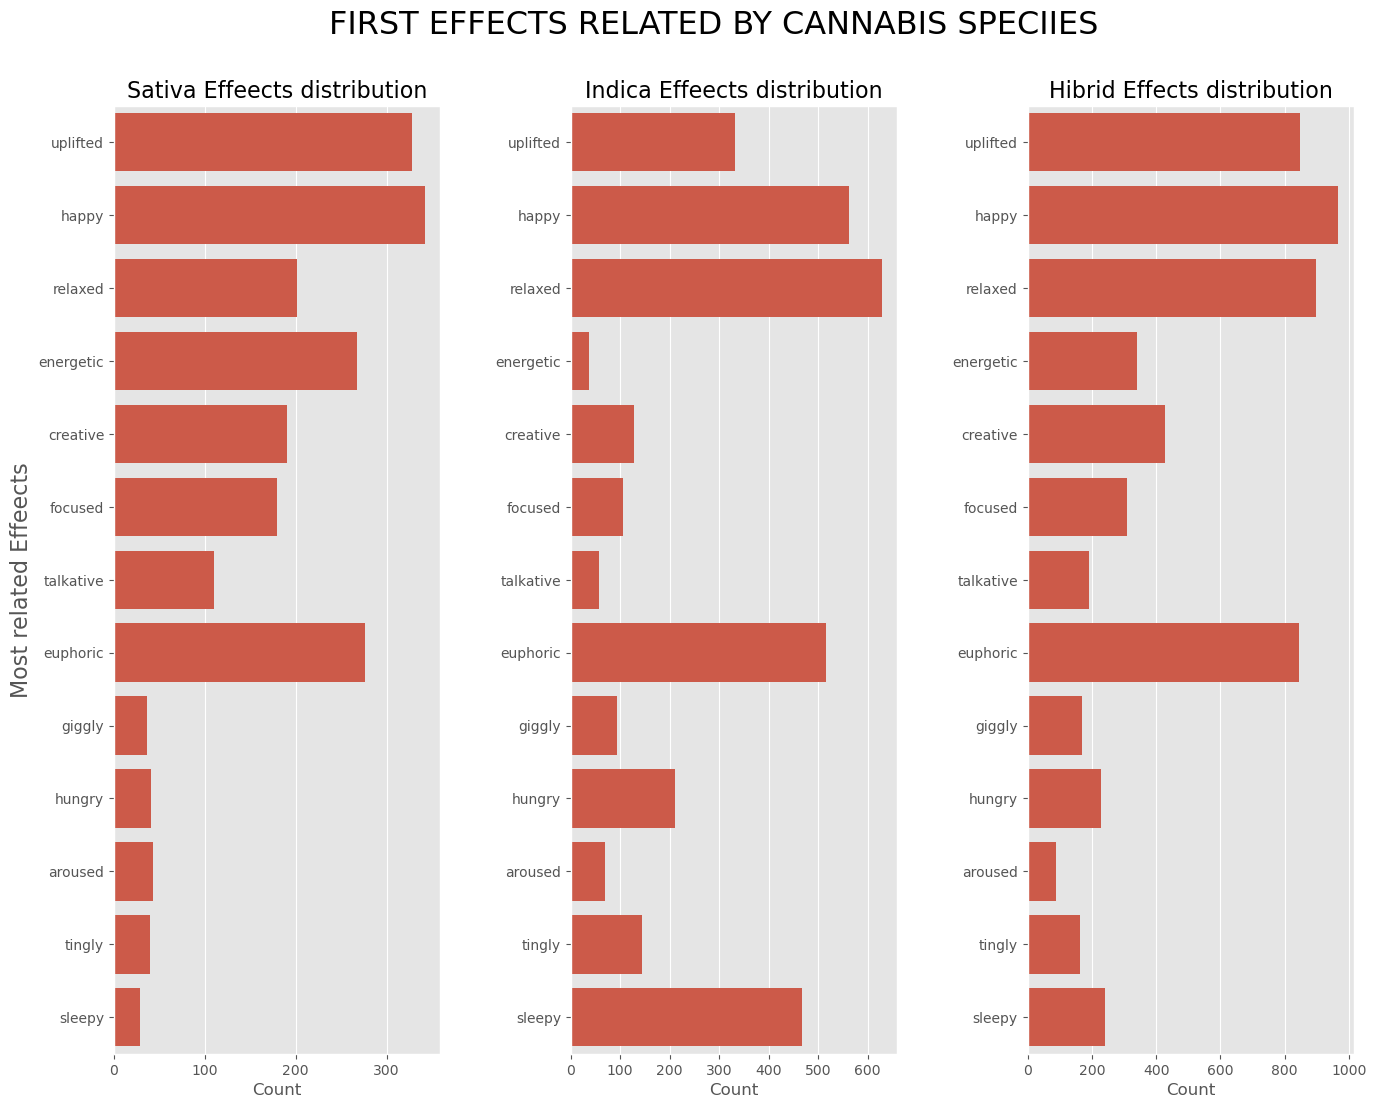

In [123]:
plt.figure(figsize=(16,12))

plt.suptitle('FIRST EFFECTS RELATED BY CANNABIS SPECIIES', fontsize=23)

plt.subplot(131)
g = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=sativa_effects, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related Effeects", fontsize=16)
g.set_title("Sativa Effeects distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values,
                data=indica_effects, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica Effeects distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='effects', x='count', order=sativa_effects.effects.values, 
                data=hibridas_effects, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid Effects distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

<p>
    Como quinto punto, se explora de forma general los sabores.
</p>

In [126]:
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

In [127]:
#Runing flavors counts to sativas
sativa_flavors = flavors(sativas)
sativa_flavors = pd.DataFrame.from_dict(sativa_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

# Geting Indicas flavors
indica_flavors = flavors(indicas)
indica_flavors = pd.DataFrame.from_dict(indica_flavors,
                                        orient='index').reset_index().rename(columns={'index': 'flavors', 
                                                                                      0:'count'})

#Getting hibridas flavors
hibridas_flavors = flavors(hibridas)
hibridas_flavors = pd.DataFrame.from_dict(hibridas_flavors,
                                          orient='index').reset_index().rename(columns={'index': 'flavors',
                                                                                        0:'count'})

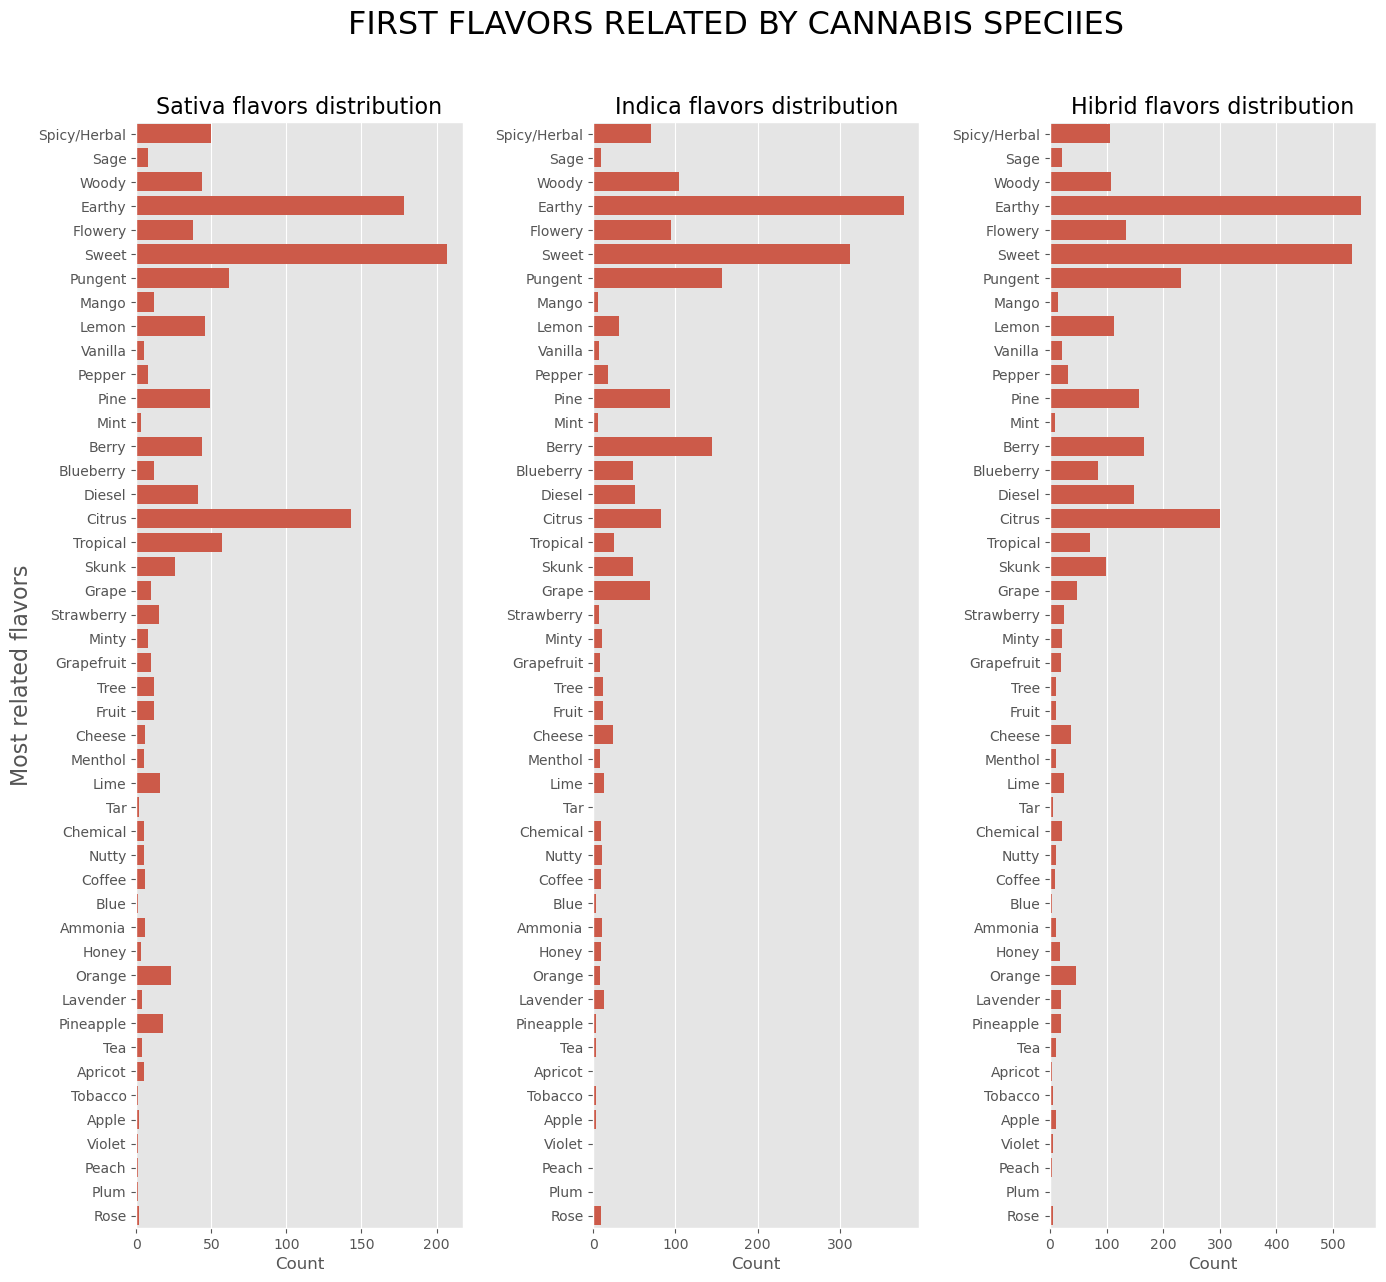

In [131]:
plt.figure(figsize=(16,14))
plt.suptitle('FIRST FLAVORS RELATED BY CANNABIS SPECIIES', fontsize=23)
plt.subplot(131)
g = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=sativa_flavors, orient='h')
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Most related flavors", fontsize=16)
g.set_title("Sativa flavors distribution", fontsize=16)


plt.subplot(132)
g1 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=indica_flavors, orient='h')
g1.set_xlabel("Count", fontsize=12)
g1.set_ylabel("",fontsize=12)
g1.set_title("Indica flavors distribution", fontsize=16)


plt.subplot(133)
g2 = sns.barplot(y='flavors', x='count', order=sativa_flavors.flavors.values,
                data=hibridas_flavors, orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("", fontsize=12)
plt.title("Hibrid flavors distribution", fontsize=16)

plt.subplots_adjust(wspace = 0.4,top = 0.90)

plt.show()

<p>
    Por último, se hace una distribución total.
</p>

In [129]:
# geting total words in review
strains['count_word'] = strains["Description"].apply(lambda x: len(str(x).split()))

# geting total letters in review
strains['count_letters'] = strains["Description"].apply(lambda x: len(str(x)))

# geting mean lenght of words
strains["mean_word_len"] = strains["Description"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

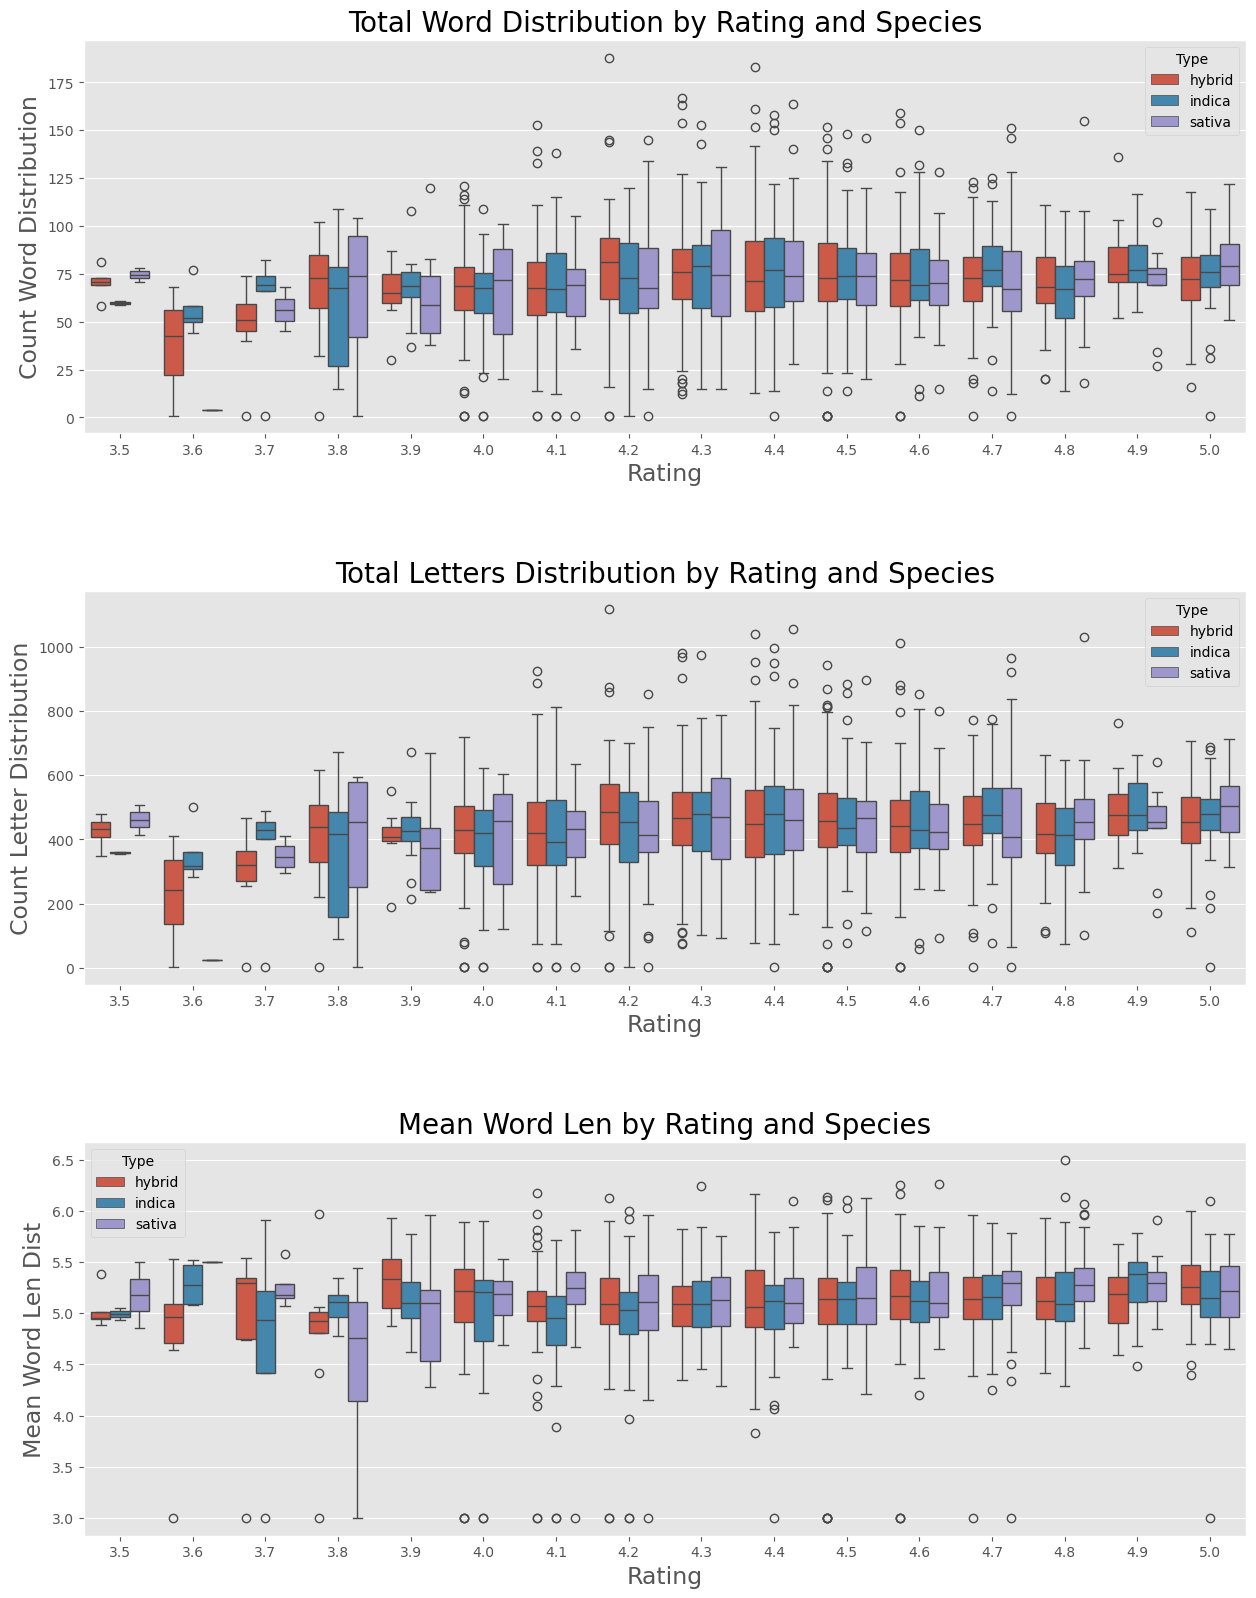

In [130]:
plt.figure(figsize=(15,17))

g = plt.subplot(311)
g = sns.boxplot(x='Rating', y='count_word', 
                hue='Type', data=strains[strains['Rating'] >= 3.5])
g.set_xlabel("Rating", fontsize=17)
g.set_ylabel("Count Word Distribution", fontsize=17)
g.set_title("Total Word Distribution by Rating and Species", 
             fontsize=20)

g1 = plt.subplot(312)
g1 = sns.boxplot(x='Rating', y='count_letters', 
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g1.set_xlabel("Rating", fontsize=17)
g1.set_ylabel("Count Letter Distribution", fontsize=17)
g1.set_title("Total Letters Distribution by Rating and Species", 
             fontsize=20)

g2 = plt.subplot(313)
g2 = sns.boxplot(x='Rating', y='mean_word_len',
                 hue='Type', data=strains[strains['Rating'] >= 3.5])
g2.set_xlabel("Rating", fontsize=17)
g2.set_ylabel("Mean Word Len Dist", fontsize=17)
g2.set_title("Mean Word Len by Rating and Species", 
             fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.99)

plt.show()

<p>
    Además como apoyo, se puede hacer una descripción a traves de "Word Clouds".
</p>

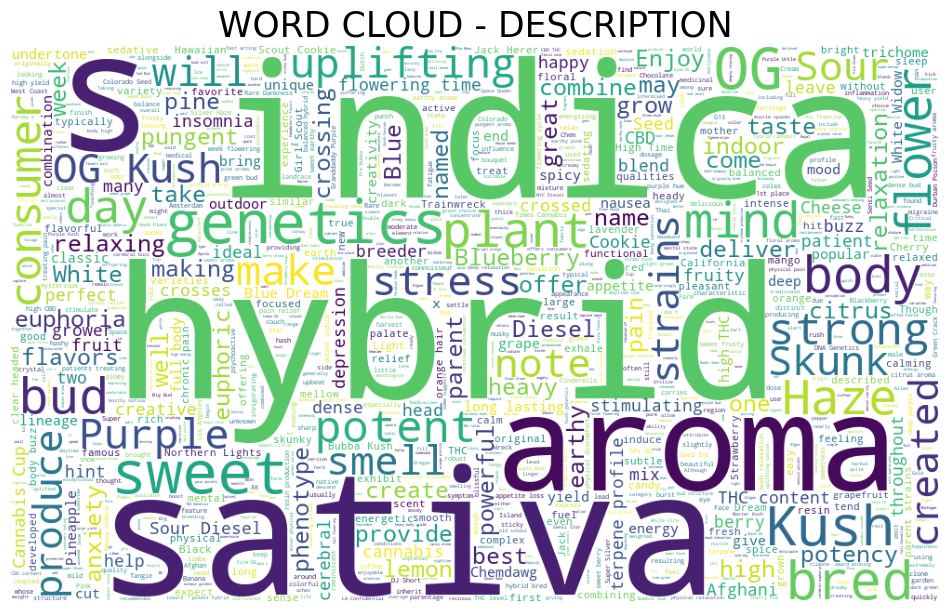

In [148]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

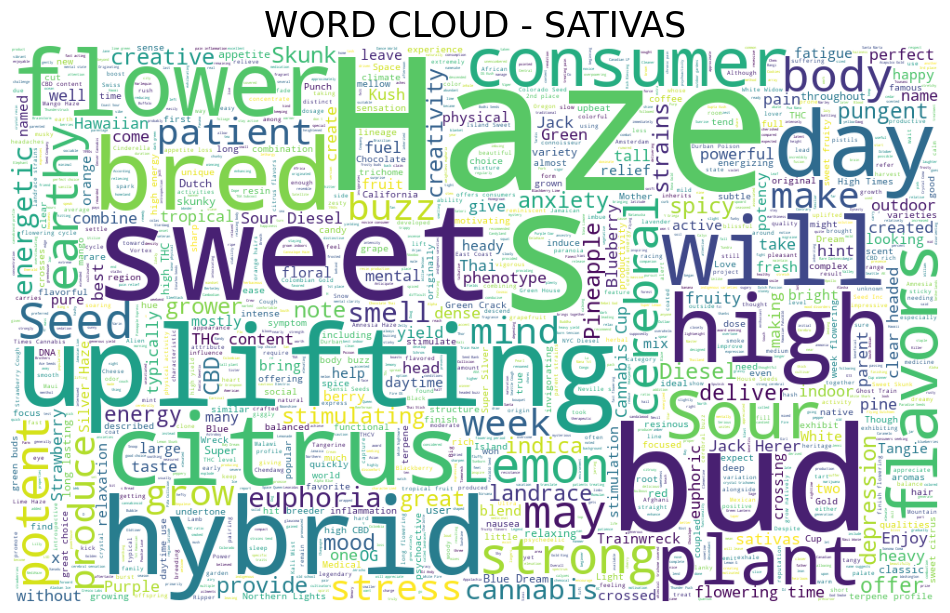

In [149]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

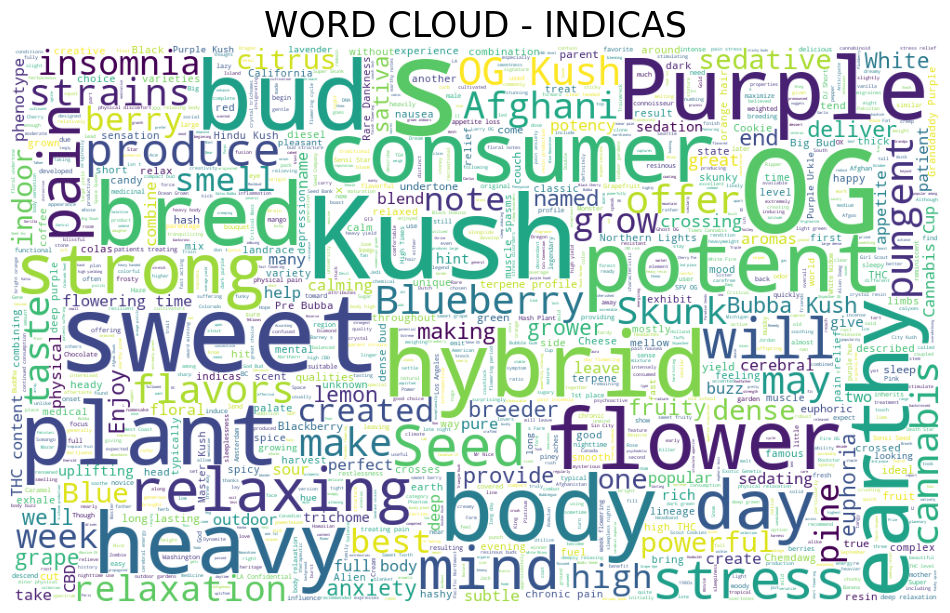

In [150]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

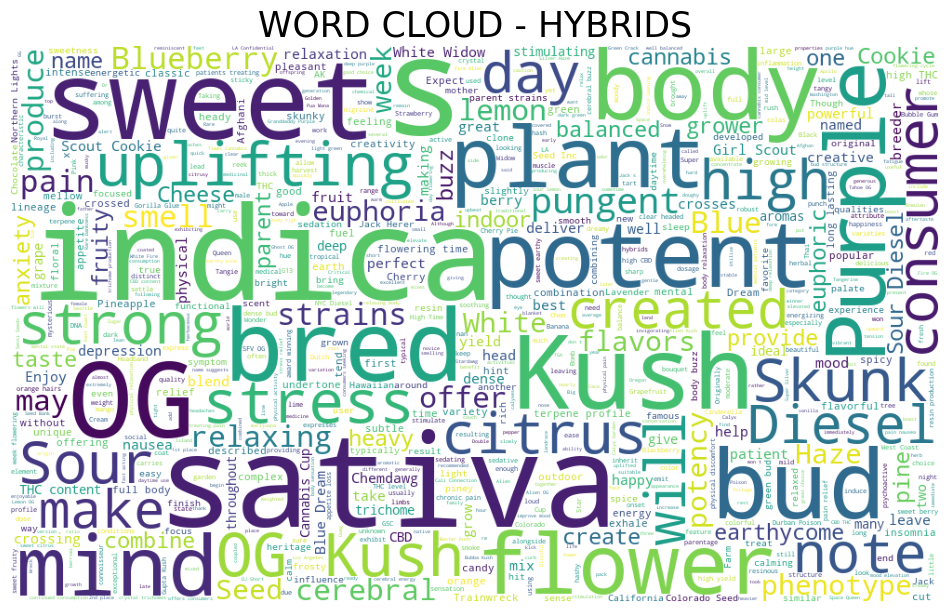

In [153]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()

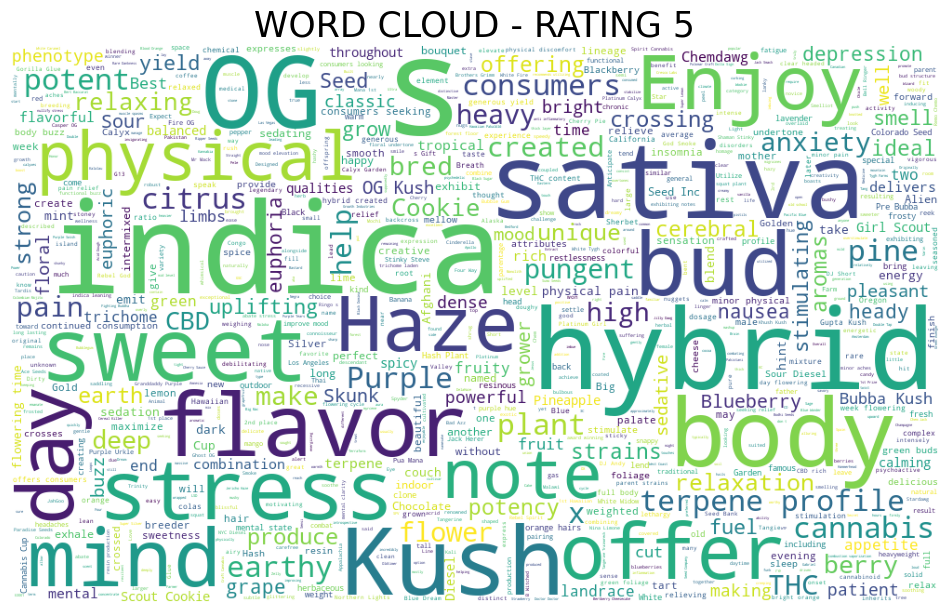

In [152]:
stopwords = set(STOPWORDS)
newStopWords = ['strain','effect', 'genetic','effects','cross','genetics',
                'aroma','consumer','known','dominant']
stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Rating == 5]['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - RATING 5", fontsize=25)
plt.axis('off')
plt.show()

<p>
    Procesamiento del dataset.
</p>

In [154]:
#Transformin the Type in numerical 
strains["Type"] = pd.factorize(strains["Type"])[0]
del strains["Description"]
# Now we have 3 numerical Types
# 0 - Hybrid
# 1 - Sativa
# 2 - Indica

In [155]:
dummy = pd.get_dummies(strains[['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5','Flavor_1','Flavor_2','Flavor_3']])


In [156]:
#Concatenating the result and droping the used variables 
strains = pd.concat([strains, dummy], axis=1)

strains = strains.drop(['Strain','Effect_1','Effect_2','Effect_3','Effect_4',
                        'Effect_5','Flavor_1','Flavor_2','Flavor_3'], axis=1)

strains.shape

(2351, 235)

<p>
    Importacion de SKLearn, para integrar el machine learning.
</p>

In [159]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

In [170]:
from sklearn.preprocessing import LabelEncoder

# Separar X y y
X = strains.drop("Type", axis=1)
y = strains["Type"]
feature_name = X.columns.tolist()

# Asegurarte de que X tiene solo columnas numéricas
X = X.select_dtypes(include=['int64', 'float64'])

# Convertir a float64 (por seguridad)
X = X.astype(np.float64, copy=False)

# Codificar y
le = LabelEncoder()
y = le.fit_transform(y)

In [171]:
#Spliting the variables in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 4)
X_test Shape:  (706, 4)


In [172]:
thresh = 5 * 10**(-3.5)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
#select features using threshold
selection = SelectFromModel(model, threshold=thresh, prefit=True)

X_important_train = selection.transform(X_train)
X_important_test = selection.transform(X_test)

C:\Users\qwerty\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\qwerty\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [173]:
print("X_important_train Shape: ", X_important_train.shape)
print("X_important_test Shape: ", X_important_test.shape)

X_important_train Shape:  (1645, 4)
X_important_test Shape:  (706, 4)


LogReg: 0.506991 (+/- 0.004467)
XGBClassifier: 0.438298 (+/- 0.024194)
KNN: 0.437690 (+/- 0.016869)
DecisionTreeClassifier: 0.391489 (+/- 0.005894)
RandomForestClassifier: 0.436474 (+/- 0.015088)
GradientBoostingClassifier: 0.458967 (+/- 0.030395)
RidgeClassifier: 0.506991 (+/- 0.003545)
BaggingRidgeClassifier: 0.435866 (+/- 0.018697)
ExtraTreesClassifier: 0.431003 (+/- 0.008893)


C:\Users\qwerty\AppData\Local\Temp\ipykernel_29164\560735496.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)
C:\Users\qwerty\AppData\Local\Temp\ipykernel_29164\560735496.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


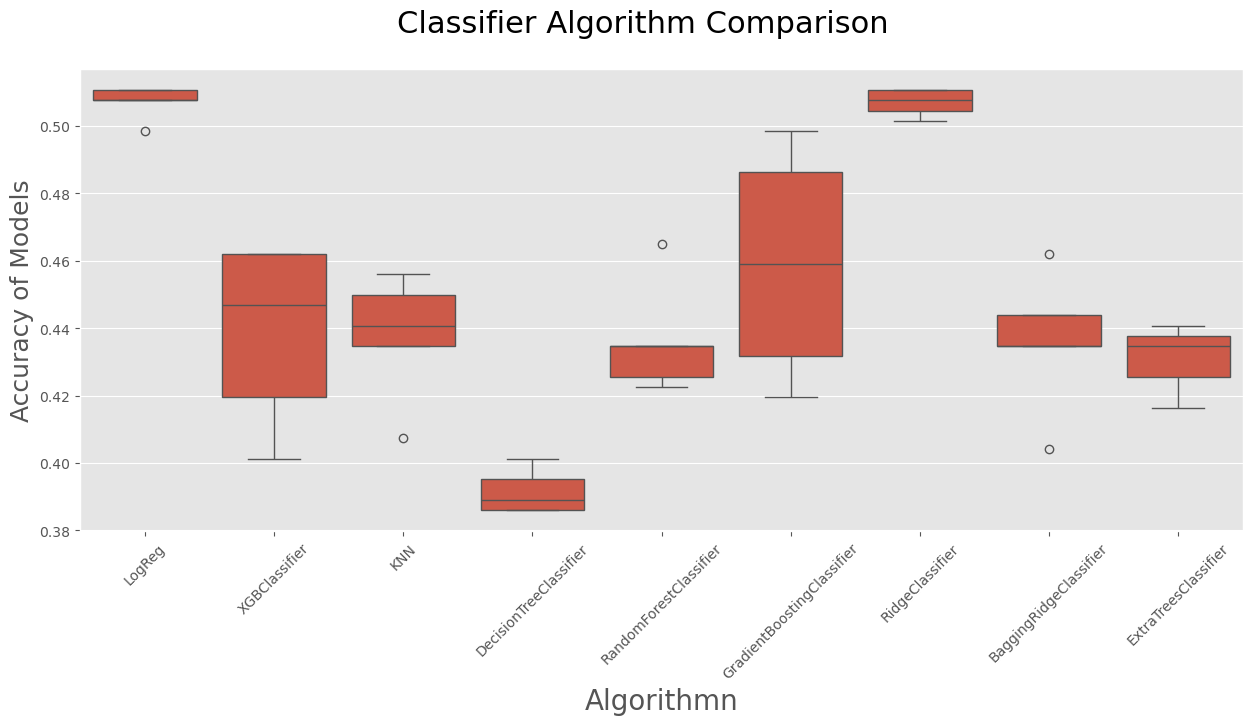

In [187]:
clfs = []
seed = 3

clfs.append(("LogReg", 
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())]))) 
clfs.append(("KNN", 
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())]))) 

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())]))) 

clfs.append(("RandomForestClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15, n_estimators=150))]))) 

clfs.append(("RidgeClassifier", 
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 7

results, names  = [], [] 

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_important_train, y_train, cv= 5, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

data = []
for name, res in zip(names, results):
    for r in res:
        data.append({'Model': name, 'Score': r})

df = pd.DataFrame(data)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Classifier Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sns.boxplot(x='Model', y='Score', data=df)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn", fontsize=20)
ax.set_ylabel("Accuracy of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

<p>
    Generación de clasificación y predicciones
</p>

In [188]:
from sklearn.model_selection import GridSearchCV

params_ridge = {'alpha':[0.001, 0.1, 1.0],
                'tol':[0.1, 0.01, 0.001], 
                'solver':['auto', 'svd', 'cholesky','lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = RidgeClassifier()
    
Ridge_model = GridSearchCV(estimator = ridge, param_grid=params_ridge, 
                           verbose=1, n_jobs = -1, 
                           cv=5)

# Fit the random search model
Ridge_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1.0],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.1, 0.01, 0.001]},
             verbose=1)

In [189]:
# Printing the Training Score
print("Training score data: ")
print(Ridge_model.score(X_important_train, y_train) )
print("Ridge Best Parameters: ")
print(Ridge_model.best_params_ )

Training score data: 
0.5100303951367782
Ridge Best Parameters: 
{'alpha': 0.001, 'solver': 'lsqr', 'tol': 0.1}


In [190]:
# Predicting with X_test
Ridge_model = RidgeClassifier(solver='sparse_cg', tol=0.001, alpha=1.0)
Ridge_model.fit(X_important_train, y_train)
y_pred = Ridge_model.predict(X_important_test)

# Print the results
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5269121813031161
[[372   0   1]
 [129   0   0]
 [204   0   0]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       373
           1       0.00      0.00      0.00       129
           2       0.00      0.00      0.00       204

    accuracy                           0.53       706
   macro avg       0.18      0.33      0.23       706
weighted avg       0.28      0.53      0.36       706



C:\Users\qwerty\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\qwerty\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\qwerty\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [201]:
param_xgb = {
 'n_estimators':[100,150,200],
 'max_depth':[3,4,5,6],
 'min_child_weight':[2,3,4,5],
 'colsample_bytree':[.1, 0.2, 0.3,0.6,0.7,0.8],
 'colsample_bylevel':[0.2,0.6,0.8]
}

In [202]:
xgb = XGBClassifier()

xgb_model = GridSearchCV(estimator = xgb, 
                        param_grid = param_xgb, 
                        scoring='accuracy',
                        cv=3,
                        verbose = 1)

xgb_model.fit(X_important_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bylevel': [0.2, 0.6, 0.8],
                         'colsample_bytree': [0.1, 0.2, 0.3, 0.6, 0.7, 0.8],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [203]:
print("Results of the GridSearchCV of XGB: ")

print(xgb_model.best_params_)

print(xgb_model.score(X_important_train, y_train))

Results of the GridSearchCV of XGB: 
{'colsample_bylevel': 0.2, 'colsample_bytree': 0.6, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100}
0.6206686930091185


In [204]:
# let's set the best parameters to our model and fit again
xgb = XGBClassifier(colsample_bylevel=0.1, colsample_bytree=.8,
                    objective='multi', max_depth= 4, min_child_weight= 2, 
                    n_estimators= 150)

xgb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = xgb.predict(X_important_test)

# Print the results
print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

METRICS 
Accuracy Score:  0.4490084985835694
[[265  33  75]
 [ 82   8  39]
 [138  22  44]]
              precision    recall  f1-score   support

           0       0.55      0.71      0.62       373
           1       0.13      0.06      0.08       129
           2       0.28      0.22      0.24       204

    accuracy                           0.45       706
   macro avg       0.32      0.33      0.31       706
weighted avg       0.39      0.45      0.41       706



In [205]:
param_gb = {
    'n_estimators':[50, 125, 150],
    'max_depth':[2,3,4],
    'max_features':[3,4,5,6],
    'learning_rate':[0.0001, 0.001, 0.01,0.1,1]
}

gb = GradientBoostingClassifier()

gb_model = GridSearchCV(estimator = gb, 
                        param_grid = param_gb, 
                        scoring='accuracy',
                        cv=5,
                        verbose = 1)

gb_model.fit(X_important_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_depth': [2, 3, 4], 'max_features': [3, 4, 5, 6],
                         'n_estimators': [50, 125, 150]},
             scoring='accuracy', verbose=1)

In [206]:
print("Results of the GridSearchCV of Gradient Boosting Classifier: ")
print(gb_model.best_params_)
print(gb_model.score(X_important_train, y_train))

Results of the GridSearchCV of Gradient Boosting Classifier: 
{'learning_rate': 0.0001, 'max_depth': 2, 'max_features': 3, 'n_estimators': 50}
0.5100303951367782


In [207]:
gb = GradientBoostingClassifier(learning_rate=.1, max_depth= 3, max_features=3, n_estimators= 150)
gb.fit(X_important_train, y_train)

# Predicting with X_test
y_pred = gb.predict(X_important_test)

# Print the results
print("METRICS \nAccuracy Score: ", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

METRICS 
Accuracy Score:  0.48158640226628896
[[307  18  48]
 [ 98   4  27]
 [164  11  29]]
              precision    recall  f1-score   support

           0       0.54      0.82      0.65       373
           1       0.12      0.03      0.05       129
           2       0.28      0.14      0.19       204

    accuracy                           0.48       706
   macro avg       0.31      0.33      0.30       706
weighted avg       0.39      0.48      0.41       706



In [217]:
# Importing the necessary library
from tpot import TPOTClassifier

In [226]:
#Creating the model and setting some parameters 
tpot = TPOTClassifier(verbosity=2,
                      max_time_mins=2, 
                      scoring='accuracy', 
                      max_eval_time_mins=2, 
                      memory='auto',
                      generations=5, 
                      population_size=15,
                      random_state=3,
                      early_stop = 3)

In [ ]:
# Fitting the Auto TPOTClassifier 
tpot.fit(X_important_train, y_train)

# Evaluating the results
print("Accuracy is {}%".format(tpot.score(X_important_test, y_test) * 100))

<h3> Análisis y conclusión</h3>
<p>
    La presente actividad tiene como principal objetivo relacionarnos con casos en los cuales se analiza datos para determinar una conclusión a incognitas pertinente al objeto de estudio. En este caso todo las preguntas estaban relacionadas a la percepción que se tiene sobre el cánnabis.<br>
    &emsp; Para lograr abordar lo anterior, se tenía que segmentar los datos; es decir, se tenía que generar nuevas variables, en las cuales se contuviera los casos analizar. Además, una vez tenida los datos segmentados, en determinados casos se le debía dar algún procesameinto extra para representar esos datos y determinar las conclusiones pertinentes a las preguntas generadas<br>
    &emsp; Durante todo el proceso, se estuvo apoyando de la estadística descriptiva: 1) para obtener conclusiones sobre los intereses y 2) para seguir procesando los datos y determinar información más certera.<br>
    &emsp; Con respecto al código, se ha de resaltar que apesar de arrojar, la mayoría de él, algunos de los bloqués necesitaba definir apropiadamente las "acciones", puesto que se solicitaba que se actualizarán algunas funciones, debido a que dentro de algunas actualizaciones no funcionarían. Además, algunos parámetros estaban mal escritos o incompletos; por lo tanto, se recurrió a modificaciones.<br>
    &emsp; De la actividad se puede rescatar cómo es indispensable reconocer que se debe identificar los tipos de datos, las variables, la cantidad de observaciones, las medidas estadísticas necesarias, así como los diagramas necesarios; pues, todos estos elementos nos permiten realizar un análisis más profundo.
</p>

<h3> Referencias</h3>
<p style="text-indent: 0; padding-left: 1.5em; text-indent: -1.5em;">
    Ferreira, L. (2019, agosto 15). Cannabis Species EDA and Models Pipeline. Kaggle. <a href="https://www.kaggle.com/code/kabure/cannabis-species-eda-and-models-pipeline/notebook"> https://www.kaggle.com/code/kabure/cannabis-species-eda-and-models-pipeline/notebook</a>
</p>